In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import linear_model
from datetime import timedelta

In [16]:
raw = pd.read_csv('../data/HUMINO.csv', 
                    index_col=0, 
                    parse_dates=True)

In [21]:
np.isnan(raw.iloc[0]['4'])

True

In [33]:
def raw_to_humidity(v):
    return (1023 - v) / 10.23

data = raw.resample('1h').mean().reindex().apply(raw_to_humidity)

In [34]:
offset = -24
step_width = 5

def predict_value(data, target):
    y = data.values.reshape(-1, 1)[offset:]
    x = ((data.index -  data.index[offset]) / 300000000000)[offset:].values.reshape(-1, 1).astype('int')

    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    rem = -1 * step_width * ((y[-1] - target) / regr.coef_[0])[0]
    return timedelta(minutes=rem)
    
    
#for col in data.columns:
#    print(col, predict_value(data[data[col].notnull()][col], 50).days, 'days')


/Users/pv/projects/humino/env/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


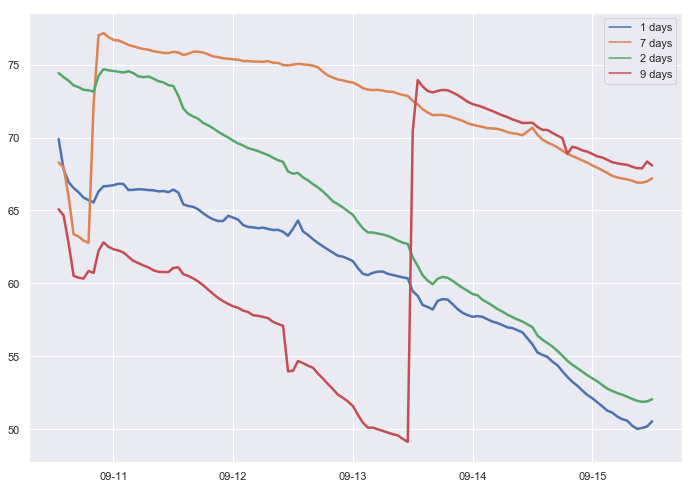

In [35]:
data_selection = data[-(5 * 24):]

sns.set()
fig1, ax1 = plt.subplots()
# the size of A4 paper
fig1.set_size_inches(11.7, 8.27)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1 = sns.lineplot(data=data_selection, linewidth=2.5, ax=ax1, dashes=False)

legend = ax1.legend()
for i, col in enumerate(data.columns):
    left = predict_value(data[data[col].notnull()][col], 40).days
    label = legend.get_texts()[i]
    if left > 0:
        label.set_text(f"{str(left)} days")
    else:
        label.set_text("wet")
    

In [33]:
import logging
import sqlite3

DB_FILENAME = "db.sqlite"

NAMES = [
    'Hibiskus',
    'Walnuss',
    'Blattpflanz',
    'Blattpflanz-2'
]

def init_db():
    logging.info("Init db..")
    conn = sqlite3.connect(DB_FILENAME)
    c = conn.cursor()
    CREATE_TABLES = '''CREATE TABLE humidity (
        id INTEGER PRIMARY KEY NOT NULL,
        plant VARCHAR(50) NOT NULL,
        value INTEGER,
        dt VARCHAR(50) NOT NULL
    );'''
    c.execute(CREATE_TABLES)
    conn.commit()
    conn.close()
    
fn = "../data/HUMINO.CSV"


0 / 83904
10000 / 83904
20000 / 83904
30000 / 83904
40000 / 83904
50000 / 83904
60000 / 83904
70000 / 83904
80000 / 83904
Importing 335616 values


In [36]:
conn = sqlite3.connect(DB_FILENAME)
data = pd.read_sql_query("SELECT * FROM humidity;", conn)
conn.close()
data.pivot(index='dt', columns='plant', values='value')

plant,0,1,2,3
dt,,,,
2018-09-04T20:11:39,240.0,317.0,214.0,NaN
2018-09-04T20:11:49,240.0,318.0,216.0,NaN
2018-09-04T20:11:59,240.0,318.0,219.0,NaN
2018-09-04T20:12:09,240.0,317.0,224.0,NaN
2018-09-04T20:12:23,240.0,315.0,228.0,NaN
2018-09-04T20:12:25,240.0,316.0,229.0,NaN
2018-09-04T20:14:12,234.0,311.0,231.0,NaN
2018-09-04T20:14:14,237.0,318.0,239.0,NaN
2018-09-04T20:14:16,239.0,318.0,243.0,NaN


In [28]:
[a for a in values if len(a) == 3][:5]

[(0, 240, Timestamp('2018-09-04 20:11:39')),
 (1, 317, Timestamp('2018-09-04 20:11:39')),
 (2, 214, Timestamp('2018-09-04 20:11:39')),
 (3, None, Timestamp('2018-09-04 20:11:39')),
 (0, 240, Timestamp('2018-09-04 20:11:49'))]